#### Завдання
### Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра **Собеля**.
### Використовуючи метод густини **градієнта HOG**, напишіть код для витягування ознак із зображення.
### Завантажте датасет **CIFAR-10** та використайте **HOG** для витягування ознак зображень. Застосуйте будь-який класифікатор (наприклад **SVM**) для класифікації зображень та обчисліть такі метрики точності:
 * accuracy;
 * precision;
 * recall;
 * F1-score.
### Використайте **метод SIFT**  для витягування ознак із зображень та порівняйте його з **методом HOG** за допомогою метрик точності.

In [1]:
# Required libraries.
import cv2
from skimage.feature import hog
from skimage import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Reading and transforming an image to GRAY.

In [6]:
# Reading an image.
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# HOG

In [ ]:
# img = cv2.imread('image.jpg')
#
# fd, hog_image = hog(img, )

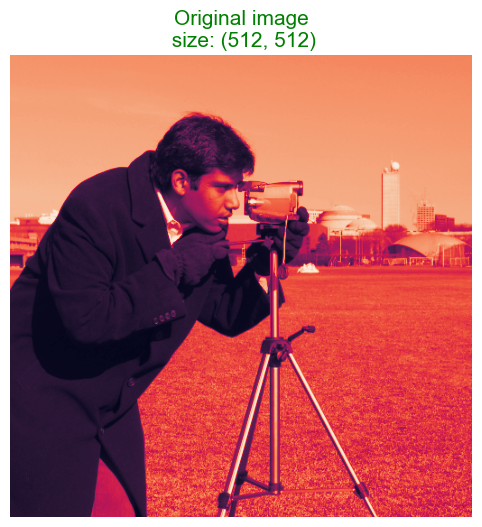

In [2]:
origin_image = data.camera()

# Visualisation.
plt.figure(figsize=(10, 6))
plt.title(f'Original image\n size: {origin_image.shape}', fontsize=15, color='g')
plt.axis('off')
plt.imshow(origin_image)
plt.show()


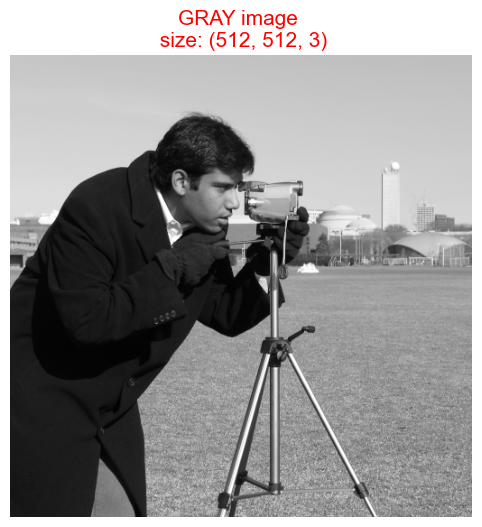

In [5]:
# Converting the origin image to RGB.
RGB_img = cv2.cvtColor(origin_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.title(f'GRAY image \n size: {RGB_img.shape}', fontsize=15, color='r')
plt.axis('off')
plt.imshow(RGB_img)
plt.show()

In [2]:
# Loading a dataset CIFAR-10/
tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 22s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16